#  Exploratory Data Analysis for 2018 NBI dataset

The purpose of this notebook is to analyze the latest FHWA Bridge Inventory dataset for the state of Pennsylvania, which corresponds to the 2018 census of all the bridges in this state. This analysis will be developed for steel girder and concrete beam bridges, two of the most common deck typologies not only in USA but mainly in the world. 

We will explore the 2018 data and narrow the scope of this analysis by making some assumptions to focus on the topic we want to develop.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

### Import Bridge data

### OJO TAMBIEN HABRÍA QUE SUBIR LOS DATOS DE ELEVATIONS O DE PRECIPITACIONES SI METEMOS ESTADOS CON OTRO CLIMA

We are creating a dataframe from the zip file obtained from FHWA dataset for all the bridges in the US National Bridge Inventory (NBIs) on 2018.

In [3]:
total18 = pd.read_csv('2018hwybronefiledel.zip',compression = 'zip',sep = ',',encoding='latin-1')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
total18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9,1999.0,2,0,50.0,2014.0,5,9.7,0,30,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,9.7,14.7,15.0,0.0,0.0,9.7,9.7,99.99,N,0.0,N,0.0,0.0,8,8,7,8,N,2,44.2,2,32.4,7,7,N,5.0,8,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,1,1.0,0,NaN,Y,8,59.0,2037.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9,2002.0,2,0,159.0,2017.0,5,6.5,0,0,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,1,0.0,0.0,1,0.0,9.7,12.9,13.6,0.3,0.3,9.1,9.8,99.99,N,0.0,N,0.0,0.0,8,8,7,7,N,2,84.2,2,34.8,7,6,N,5.0,7,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,8,1.0,0,NaN,Y,8,200.0,2034.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9,1942.0,2,0,375.0,2017.0,4,10.4,0,0,0,0,0,1,1,5.0,0,0.0,0.0,A,1,5,1,4,0.0,0.0,3,0.0,7.2,18.3,43.0,0.6,0.6,7.2,9.0,99.99,N,0.0,N,0.0,0.0,5,5,6,6,N,2,51.7,2,37.2,5,4,N,5.0,8,6.0,38.0,1.0,52.8,1017.0,24.0,N,Y60,N,NaN,1017.0,NaN,1.0,1.0,2.0,2017.0,NaN,NaN,NaN,0.0,N,2,NaN,

In [6]:
total18.shape

(616096, 137)

There are 616096 bridges in the NBIs dataset and 137 columns with variables.

However, we will first reduce our dataset by focusing only in Pennsylvania, whose code in this dataset is 42.

### AQUI SE PUEDE MOSTRAR UNA VISUALIZACION PARA VER QUE EN PA ES DONDE MAS PUENTES DE VIGAS HAY Y POR ESO ELEGIMOS ESE ESTADO


In [7]:
list(total18.columns)

Index(['STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A',
       'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D',
       'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003',
       'PLACE_CODE_004',
       ...
       'DTL_TYPE_OF_IMP', 'SPECIAL_CODE', 'STEP_CODE', 'STATUS_WITH_10YR_RULE',
       'SUFFICIENCY_ASTERC', 'SUFFICIENCY_RATING', 'STATUS_NO_10YR_RULE',
       'CAT10', 'CAT23', 'CAT29'],
      dtype='object', length=137)

In [14]:
total18.dtypes

STATE_CODE_001              int64
STRUCTURE_NUMBER_008       object
RECORD_TYPE_005A            int64
ROUTE_PREFIX_005B         float64
SERVICE_LEVEL_005C        float64
ROUTE_NUMBER_005D          object
DIRECTION_005E            float64
HIGHWAY_DISTRICT_002       object
COUNTY_CODE_003           float64
PLACE_CODE_004            float64
FEATURES_DESC_006A         object
CRITICAL_FACILITY_006B    float64
FACILITY_CARRIED_007       object
LOCATION_009               object
MIN_VERT_CLR_010          float64
KILOPOINT_011             float64
BASE_HWY_NETWORK_012      float64
LRS_INV_ROUTE_013A         object
SUBROUTE_NO_013B          float64
LAT_016                   float64
LONG_017                  float64
DETOUR_KILOS_019            int64
TOLL_020                    int64
MAINTENANCE_021             int64
OWNER_022                   int64
FUNCTIONAL_CLASS_026        int64
YEAR_BUILT_027            float64
TRAFFIC_LANES_ON_028A       int64
TRAFFIC_LANES_UND_028B      int64
ADT_029       

In [7]:
pastate = [42]
#mystates = [42,39]
pa18 = total18[total18['STATE_CODE_001'].isin(pastate)]

In [9]:
pa18.shape

(22737, 137)

In [10]:
# Let's save this dataframe as a csv file since this will be the dataframe we will be performing our EDA on.
pa18.to_csv (r'./pa18.csv', index = None, header=True)

## EJECUTAR A PARTIR DE AQUI CUANDO RETOME ESTE NOTEBOOK

In [35]:
pa18 = pd.read_csv('pa18.csv')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,17,75,98,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clear and Merge Data

We will perform several filters in order to clear our data and get some useful insights. 
The filters will be developed from generic to more specific features.

We will also need to add columns and transform some variables.

Our filters and merge operations will be: 

    

    1) Selecting only bridges: the FHWA inventory includes data on both bridges and culverts.

    2) Limit the dataset to bridges built after 1900: bridges built before ASTM standards (founded in 1898) would have had inconsistent standards for material acceptance in the bridge.
    
    3) Selecting only the columns we will be interested in.

    4) Filtering only the bridges with steel girders and prestressed concrete decks.
    
    5) Clear variables with too many categories

    


In [36]:
list(pa18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

In [37]:
#The culverts will be dropped out of our dataset

pa18 = pa18.loc[pa18['CULVERT_COND_062']=='N']

In [38]:
pa18.shape

(20152, 137)

In [40]:
#Drop bridges built before 1900 due to material standards

pa18 = pa18[pa18['YEAR_BUILT_027']>1900]

In [41]:
pa18.shape

(19564, 137)

In [42]:
# Let's select only the columns we will work with

descriptive_cols = ['STRUCTURE_NUMBER_008',
                   'LAT_016',
                   'LONG_017']

geometric_cols = ['TRAFFIC_LANES_ON_028A',
                  'MEDIAN_CODE_033',
                  'DEGREES_SKEW_034',
                  'STRUCTURE_KIND_043A',
                  'STRUCTURE_TYPE_043B',
                  'MAIN_UNIT_SPANS_045',
                  'MAX_SPAN_LEN_MT_048',
                  'STRUCTURE_LEN_MT_049',
                  'DECK_WIDTH_MT_052',
                  'SURFACE_TYPE_108A']

functional_cols = ['YEAR_BUILT_027',
                   'ADT_029',
                   'DESIGN_LOAD_031',
                   'PERCENT_ADT_TRUCK_109']

operational_cols = ['MAINTENANCE_021',
                    'FUNCTIONAL_CLASS_026',
                    'WATERWAY_EVAL_071',
                    'YEAR_RECONSTRUCTED_106']

rating_cols = ['DECK_COND_058',
               'SUPERSTRUCTURE_COND_059',
               'SUBSTRUCTURE_COND_060']

In [43]:
cols_interest = descriptive_cols+geometric_cols+functional_cols+operational_cols+rating_cols
cols_interest

['STRUCTURE_NUMBER_008',
 'LAT_016',
 'LONG_017',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'ADT_029',
 'DESIGN_LOAD_031',
 'PERCENT_ADT_TRUCK_109',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'YEAR_RECONSTRUCTED_106',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

In [116]:
# Let's reduce the dataset to those columns
pa18_filtered = pa18[cols_interest]

In [68]:
pa18_filtered.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,PERCENT_ADT_TRUCK_109,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
1,000000000000001,39432979.0,77181454.0,2,0,9,5,2,2,20.1,40.2,10.2,3,1963.0,852.0,5,8.0,1,19,N,0.0,8,7,7
2,000000000000002,39440820.0,77175007.0,2,1,6,5,2,1,29.9,31.4,13.0,1,1990.0,9057.0,9,16.0,1,2,9,0.0,7,7,7
3,000000000000003,39440881.0,77175080.0,2,1,6,5,6,2,14.6,30.8,13.9,1,1963.0,9092.0,5,16.0,1,2,9,1990.0,6,6,6
4,000000000000004,39443501.0,77164757.0,2,1,0,6,6,2,22.3,45.4,13.0,1,1990.0,9698.0,9,15.0,1,2,9,NaN,7,7,7
5,000000000000005,39443582.0,77164802.0,2,1,0,5,2,2,21.6,45.7,13.9,3,1963.0,9145.0,5,17.0,1,2,9,0.0,5,6,5


In [117]:
pa18_filtered.shape

(19564, 24)

In [47]:
pa18_filtered.dtypes

STRUCTURE_NUMBER_008        object
LAT_016                    float64
LONG_017                   float64
TRAFFIC_LANES_ON_028A        int64
MEDIAN_CODE_033              int64
DEGREES_SKEW_034             int64
STRUCTURE_KIND_043A          int64
STRUCTURE_TYPE_043B          int64
MAIN_UNIT_SPANS_045          int64
MAX_SPAN_LEN_MT_048        float64
STRUCTURE_LEN_MT_049       float64
DECK_WIDTH_MT_052          float64
SURFACE_TYPE_108A           object
YEAR_BUILT_027             float64
ADT_029                    float64
DESIGN_LOAD_031             object
PERCENT_ADT_TRUCK_109      float64
MAINTENANCE_021              int64
FUNCTIONAL_CLASS_026         int64
WATERWAY_EVAL_071           object
YEAR_RECONSTRUCTED_106     float64
DECK_COND_058               object
SUPERSTRUCTURE_COND_059     object
SUBSTRUCTURE_COND_060       object
dtype: object

In [115]:
object_cols = ['SURFACE_TYPE_108A','DESIGN_LOAD_031','WATERWAY_EVAL_071','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']

In [131]:
# Convert the columns with no type to numeric values
for col in object_cols:
    pa18_filtered[col] = pd.to_numeric(pa18_filtered[col], errors='coerce')
    pa18_filtered[col] = pa18_filtered[col].astype('float64')
    

In [119]:
pa18_filtered.head()

,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,PERCENT_ADT_TRUCK_109,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
1,000000000000001,39432979.0,77181454.0,2,0,9,5,2,2,20.1,40.2,10.2,3.0,1963.0,852.0,5.0,8.0,1,19,NaN,0.0,8.0,7.0,7.0
2,000000000000002,39440820.0,77175007.0,2,1,6,5,2,1,29.9,31.4,13.0,1.0,1990.0,9057.0,9.0,16.0,1,2,9.0,0.0,7.0,7.0,7.0
3,000000000000003,39440881.0,77175080.0,2,1,6,5,6,2,14.6,30.8,13.9,1.0,1963.0,9092.0,5.0,16.0,1,2,9.0,1990.0,6.0,6.0,6.0
4,000000000000004,39443501.0,77164757.0,2,1,0,6,6,2,22.3,45.4,13.0,1.0,1990.0,9698.0,9.0,15.0,1,2,9.0,NaN,7.0,7.0,7.0
5,000000000000005,39443582.0,77164802.0,2,1,0,5,2,2,21.6,45.7,13.9,3.0,1963.0,9145.0,5.0,17.0,1,2,9.0,0.0,5.0,6.0,5.0


In [120]:
# We only want the bridges with steel girders and prestressed concrete beams
pa18_filtered['STRUCTURE_KIND_043A'].unique()

array([5, 6, 4, 1, 3, 8, 2, 7, 0, 9])

In [121]:
# We only want the bridges with steel girders and prestressed concrete beams
pa18_filtered['STRUCTURE_TYPE_043B'].unique()

array([ 2,  6,  5,  4, 20, 11,  1,  0,  7, 10,  3,  9, 12, 22, 13, 15,  8,
       16, 21])

In [122]:
# The item codification is as follows: 
# 3 for steel, 4 for steel continuous, 5 for pre-stressed concrete and 6 for pre-stressed concrete continuous

pa18_filtered = pa18_filtered[(pa18_filtered['STRUCTURE_KIND_043A'].isin([3,4,5,6]))]

In [123]:
pa18_filtered.shape

(15342, 24)

In [124]:
# The item codification is 2 for stringer/multi-beam or girder
pa18_filtered = pa18_filtered[(pa18_filtered['STRUCTURE_TYPE_043B']==2)]

In [125]:
pa18_filtered.shape

(7360, 24)

In [106]:
# Transformando variables

In [126]:
# Median on bridge - ITEM 33
code_median = {0:0,1:1,2:2,3:2}
pa18_filtered['MEDIAN_CODE_033'] = pa18_filtered['MEDIAN_CODE_033'].map(code_median)

In [127]:
# Structure Type - ITEM 43A
code_struc = {3:'steel',4:'steel',5:'concrete',6:'concrete'}
pa18_filtered['STRUCTURE_KIND_043A'] = pa18_filtered['STRUCTURE_KIND_043A'].map(code_struc)

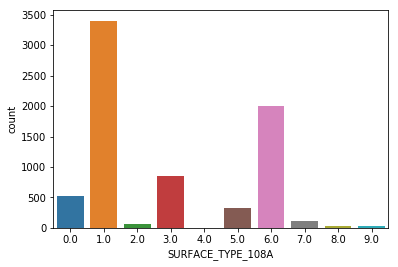

In [128]:
# Wearing surface - ITEM 108
sns.countplot(pa18_filtered['SURFACE_TYPE_108A'])

In [134]:
code_ws = {1:'concrete',2:'concrete',3:'concrete',4:'concrete',
          6:'bituminous', 0:'none'}

pa18_filtered['SURFACE_TYPE_108A'] = pa18_filtered['SURFACE_TYPE_108A'].map(code_ws)

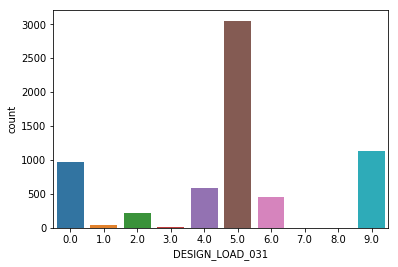

In [136]:
# Design Load - ITEM 31
sns.countplot(pa18_filtered['DESIGN_LOAD_031'])

In [158]:
code_truck = {0:'other',7:'other',8:'other',
              1:'light',2:'light',3:'light',4:'light',
              5:'heavy',6:'heavy',9:'heavy'}

pa18_filtered['DESIGN_LOAD_031'] = pa18_filtered['DESIGN_LOAD_031'].map(code_truck)
#pa18_filtered['DESIGN_LOAD_031'].dropna(inplace= True)

## REHACER ESTE ULTIMO PASO DE DROP NA PORQUE NO HA SALIDO BIEN
## CHEQUEAR SI QUEDAN NAN EN LOS ANTERIORES

In [147]:
# Maintenanace Responsability - ITEM 21
code_resp = {1:1,2:2,3:3,4:4}
pa18_filtered['MAINTENANCE_021'] = pa18_filtered['MAINTENANCE_021'].map(code_resp)
pa18_filtered['MAINTENANCE_021'].fillna(5, inplace = True)

In [153]:
# Functional Classification - ITEM 26
code_class = {1:'rural',2:'rural',6:'rural',7:'rural',8:'rural',9:'rural',
              11:'urban',12:'urban',14:'urban',16:'urban',17:'urban',19:'urban'}
pa18_filtered['FUNCTIONAL_CLASS_026'] = pa18_filtered['FUNCTIONAL_CLASS_026'].map(code_class)

In [154]:
# Waterway - ITEM 71
code_water = {9:'low',8:'low',
              7:'high',6:'high',5:'high',4:'high',3:'high',2:'high',
              np.nan:'none'}

pa18_filtered['WATERWAY_EVAL_071'] = pa18_filtered['WATERWAY_EVAL_071'].map(code_water)

In [159]:
pa18_filtered['DESIGN_LOAD_031'].unique()

array([], dtype=object)